In [59]:
#Getting data
import numpy as np
import pandas as pd

In [60]:
train_data = pd.read_csv("train.csv")
train_data['Train'] = 'Train'
test_data = pd.read_csv("test.csv")
test_data['Train'] = 'Test'

data = train_data.append(test_data, sort=False)

In [61]:
#Data exploration
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Train          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [63]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [64]:
data.isna().sum()
#Age, Fare, Embarked are missing and should be filled, cabin will be dropped bc too many missing

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Train             0
dtype: int64

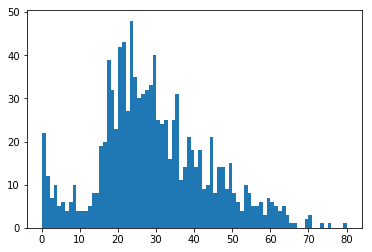

In [65]:
plt.hist(data['Age'], bins=80)
plt.show()
#Age is skewed so we take the median
data["Age"].fillna(data['Age'].median(), inplace=True)

In [66]:
data.groupby('Embarked').count()
#S is the most common category so fillna with S
data['Embarked'].fillna('S', inplace=True)

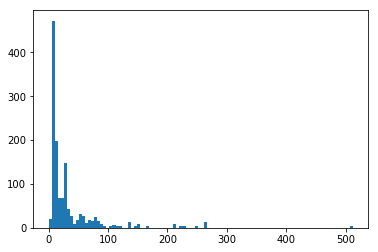

In [67]:
plt.hist(data['Fare'], bins=100)
plt.show()
#Fare is heavily skewed so use of median to fillna, depends on class so median groupby class
data['Fare'] = data.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(np.median(x)))

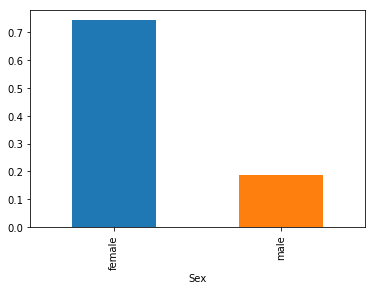

In [68]:
data[['Sex', 'Survived']].groupby('Sex')['Survived'].mean().plot(kind='bar')
#Sex has strong correlation with survival => categorize with dummies

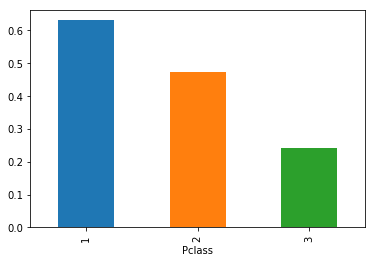

In [69]:
data[['Pclass', 'Survived']].groupby('Pclass')['Survived'].mean().plot(kind='bar')
#Survival correlated with Pclass so encode in categories

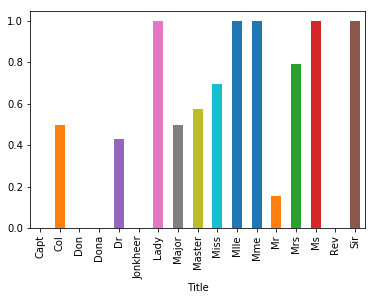

In [70]:
data['Name']
#Titles can be extracted via regex
import re
data['Title'] = data['Name'].str.extract(r'^.+, ([A-Za-z]+)\..+$')

data[['Title', 'Survived']].groupby('Title')['Survived'].mean().plot(kind='bar')
#The title is very predictive, categorize and one-hot encoding
data[data['Title'].isna()==True]
#One title still missing = The Countess -> is Lady
data['Title'].fillna('Lady', inplace=True)

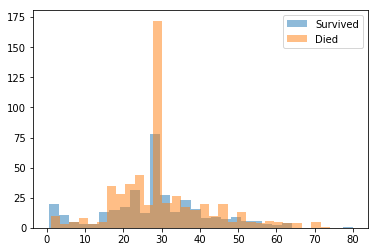

In [71]:
survived = data[data['Survived']==1]
died = data[data['Survived']==0]
plt.hist(survived['Age'], bins=30, alpha=0.5, label='Survived')
plt.hist(died['Age'], bins=30, alpha=0.5, label='Died')
plt.legend()
plt.show()
plt.close()
#Age seems to be predictive, there seem to be categories so bins: 0-18 (Child), 18-30 (Young adult), 30-40 (Adult), 40-50 (Old adult), 50+ (Senior)

In [72]:
data['Age_cat'] = 'Child'
data.loc[data['Age']>18, 'Age_cat'] = 'Young adult'
data.loc[data['Age']>=30, 'Age_cat'] = 'Adult'
data.loc[data['Age']>=40, 'Age_cat'] = 'Old adult'
data.loc[data['Age']>=50, 'Age_cat'] = 'Senior'

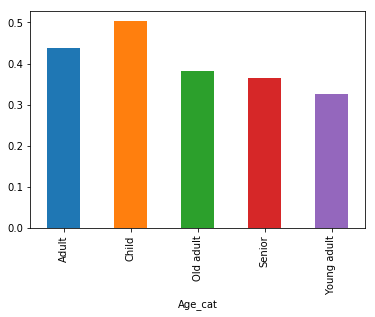

In [73]:
data[['Survived', 'Age_cat']].groupby(['Age_cat'])['Survived'].mean().plot(kind='bar')
#bins to categorize

In [74]:
#SibSp and Parch can be combined to obtain total nb of family members
data['nb_family'] = data['SibSp'] + data['Parch']
data.groupby('nb_family').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Train,Title,Age_cat
nb_family,,,,,,,,,,,,,,,
0,790,537,790,790,790,790,790,790,790,789,131,790,790,790,790
1,235,161,235,235,235,235,235,235,235,235,96,235,235,235,235
2,159,102,159,159,159,159,159,159,159,159,44,159,159,159,159
3,43,29,43,43,43,43,43,43,43,43,13,43,43,43,43
4,22,15,22,22,22,22,22,22,22,22,5,22,22,22,22
5,25,22,25,25,25,25,25,25,25,25,6,25,25,25,25
6,16,12,16,16,16,16,16,16,16,16,0,16,16,16,16
7,8,6,8,8,8,8,8,8,8,8,0,8,8,8,8
10,11,7,11,11,11,11,11,11,11,11,0,11,11,11,11


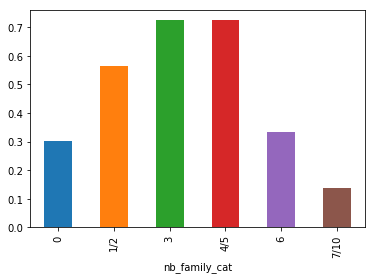

In [75]:
data[['Survived', 'nb_family']].groupby('nb_family')['Survived'].mean().plot(kind='bar')
#Groups: 0, 1/2, 3, 4/5, 6, 7/10
data['nb_family_cat'] = "0"
data.loc[data['nb_family']>=1, 'nb_family_cat'] = "1/2"
data.loc[data['nb_family']>=3, 'nb_family_cat'] = "3"
data.loc[data['nb_family']>=4, 'nb_family_cat'] = "4/5"
data.loc[data['nb_family']>=6, 'nb_family_cat'] = "6"
data.loc[data['nb_family']>=7, 'nb_family_cat'] = "7/10"

data[['Survived', 'nb_family_cat']].groupby('nb_family_cat')['Survived'].mean().plot(kind='bar')

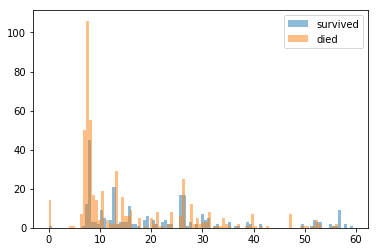

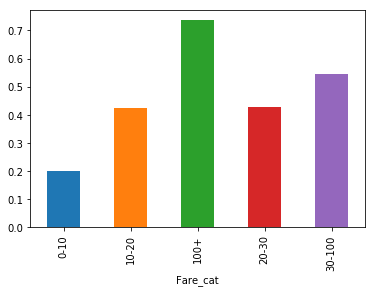

In [76]:
survived = survived[survived['Fare']<60]
died = died[died['Fare']<60]
plt.hist(survived['Fare'], bins=100, alpha=0.5, label='survived')
plt.hist(died['Fare'], bins=100, alpha=0.5, label='died')
plt.legend()
plt.show()
#Fare can be binned 0-10, 10-20, 20-30, 30-100, 100+
data['Fare_cat'] = '0-10'
data.loc[data['Fare'] >= 10, 'Fare_cat'] = '10-20'
data.loc[data['Fare'] >= 20, 'Fare_cat'] = '20-30'
data.loc[data['Fare'] >= 30, 'Fare_cat'] = '30-100'
data.loc[data['Fare'] >= 100, 'Fare_cat'] = '100+'
data[['Survived', 'Fare_cat']].groupby('Fare_cat')['Survived'].mean().plot(kind='bar')

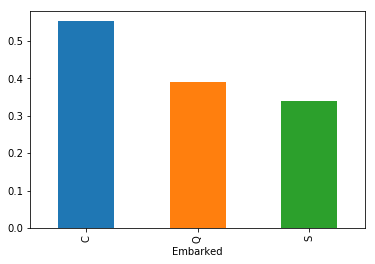

In [77]:
data[['Survived', 'Embarked']].groupby('Embarked')['Survived'].mean().plot(kind='bar')
# Embarked is predictive and will be categorized

In [78]:
data.dtypes

PassengerId        int64
Survived         float64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
Train             object
Title             object
Age_cat           object
nb_family          int64
nb_family_cat     object
Fare_cat          object
dtype: object

In [79]:
# X and y

data_X =  data[['Pclass', 'Sex', 'Embarked', 'Train', 'Title',
       'Age_cat', 'nb_family_cat', 'Fare_cat']]

data_y = data[['Survived', 'Train']]

In [80]:
#Encoding categrocial var
Pclass_dummy = pd.get_dummies(data_X['Pclass'])
Sex_dummy = pd.get_dummies(data_X['Sex'])
Embarked_dummy = pd.get_dummies(data_X['Embarked'])
Title_dummy = pd.get_dummies(data_X['Title'])
Age_cat_dummy = pd.get_dummies(data_X['Age_cat'])
nb_family_cat_dummy = pd.get_dummies(data_X['nb_family_cat'])
Fare_cat_dummy = pd.get_dummies(data_X['Fare_cat'])

X = pd.concat((Pclass_dummy, Sex_dummy, Embarked_dummy, Title_dummy, Age_cat_dummy, nb_family_cat_dummy, Fare_cat_dummy, data_X['Train']), axis=1)

#X_train X_test y_train
X_train = X[X['Train']=='Train']
X_train = X_train.drop(columns=['Train'])
X_train = X_train.values

X_test = X[X['Train']=='Test']
X_test = X_test.drop(columns=['Train'])
X_test = X_test.values

y_train = data_y[data_y['Train']=='Train']
y_train = y_train.drop(columns=['Train'])
y_train = y_train.values

In [81]:
#Build model

from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(13, input_dim = 41, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


model.fit(X_train, y_train, epochs=100)

Epoch 1/100
891/891 [==============================] - 1s 1ms/step - loss: 0.6652 - accuracy: 0.5937
Epoch 2/100
891/891 [==============================] - 0s 124us/step - loss: 0.6244 - accuracy: 0.6936
Epoch 3/100
891/891 [==============================] - 0s 121us/step - loss: 0.5895 - accuracy: 0.71270s - loss: 0.6024 - accuracy: 0.68
Epoch 4/100
891/891 [==============================] - 0s 107us/step - loss: 0.5593 - accuracy: 0.7553
Epoch 5/100
891/891 [==============================] - 0s 102us/step - loss: 0.5438 - accuracy: 0.7710
Epoch 6/100
891/891 [==============================] - 0s 110us/step - loss: 0.4855 - accuracy: 0.8025
Epoch 7/100
891/891 [==============================] - 0s 93us/step - loss: 0.4806 - accuracy: 0.7946
Epoch 8/100
891/891 [==============================] - 0s 117us/step - loss: 0.4803 - accuracy: 0.7856
Epoch 9/100
891/891 [==============================] - 0s 92us/step - loss: 0.4592 - accuracy: 0.8103
Epoch 10/100
891/891 [=====================

891/891 [==============================] - 0s 137us/step - loss: 0.3603 - accuracy: 0.8373
Epoch 80/100
891/891 [==============================] - 0s 132us/step - loss: 0.3624 - accuracy: 0.8519
Epoch 81/100
891/891 [==============================] - 0s 136us/step - loss: 0.3685 - accuracy: 0.8462
Epoch 82/100
891/891 [==============================] - 0s 139us/step - loss: 0.3677 - accuracy: 0.8395
Epoch 83/100
891/891 [==============================] - 0s 128us/step - loss: 0.3631 - accuracy: 0.8519
Epoch 84/100
891/891 [==============================] - 0s 121us/step - loss: 0.3648 - accuracy: 0.8541
Epoch 85/100
891/891 [==============================] - 0s 114us/step - loss: 0.3560 - accuracy: 0.8530
Epoch 86/100
891/891 [==============================] - 0s 127us/step - loss: 0.3586 - accuracy: 0.8530
Epoch 87/100
891/891 [==============================] - 0s 122us/step - loss: 0.3558 - accuracy: 0.8474
Epoch 88/100
891/891 [==============================] - 0s 123us/step - loss:

In [82]:
Y_test = model.predict(X_test)

In [83]:
test_predict = pd.DataFrame(Y_test, columns=['y_score'])
test_predict = pd.concat((test_predict, test_data['PassengerId']), axis=1)


In [84]:
test_predict['Survived'] = test_predict['y_score'].apply(lambda x: 1 if x>0.5 else 0)
test_predict = test_predict[['PassengerId', 'Survived']]

In [85]:
test_predict.to_csv('predict_y.csv', index=False)

In [86]:
###Random forest model
#Gridsearch for parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(oob_score=True, random_state=1)
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=random_forest, param_grid=param_grid, scoring='accuracy', cv=3)
gs = gs.fit(X_train, y_train)

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jean_\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection

In [38]:
gs.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 700}

In [43]:
random_forest_tuned = RandomForestClassifier(verbose=1,oob_score=True, random_state=1, criterion='gini', min_samples_leaf=1, min_samples_split=16, n_estimators=700)
random_forest_tuned.fit(X_train, y_train.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    1.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=True, random_state=1, verbose=1, warm_start=False)

In [54]:
Y_test_forest = random_forest_tuned.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.1s finished


In [57]:
test_predict_forest = pd.DataFrame(Y_test_forest, columns=['Survived'])
test_predict_forest = pd.concat((test_predict_forest, test_data['PassengerId']), axis=1)
test_predict_forest['Survived'] = test_predict_forest['Survived'].astype(int)

In [87]:
test_predict_forest.to_csv('predict_forest.csv', index=False)